In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('people.csv')

In [3]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
df.rename(columns = {'timeSpent.company':'timeSpent_company'}, inplace = True) 

In [5]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.duplicated().sum()

3008

In [8]:
df=df.drop_duplicates(keep='first') 

In [9]:
df.shape

(11991, 10)

# Normality Test

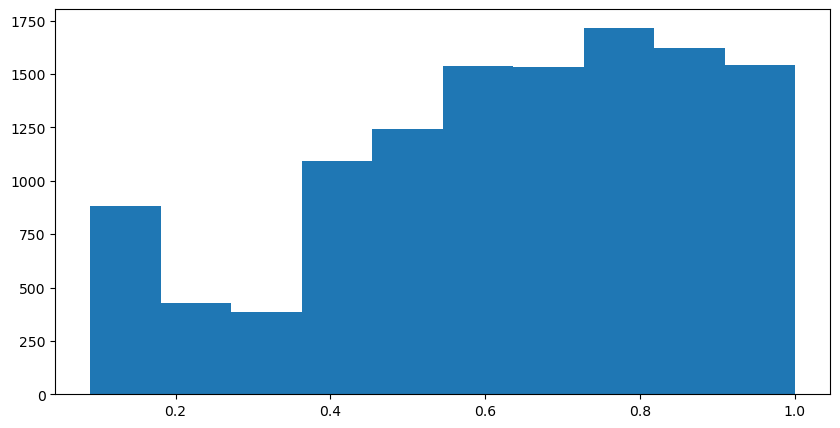

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df["satisfactoryLevel"])
plt.show()

In [12]:
# Null hypothesis (h0) - data is normally distributed
# Alternate hypothesis (h1) - data is not normally distributed

In [13]:
from scipy.stats import shapiro

In [14]:
stat,p_value=shapiro(df["satisfactoryLevel"])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
print(p_value)

0.0


In [16]:
# p value is less than 0.05 reject null hypothesis, data is not normally distributed

In [17]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [18]:
df1=df

In [19]:
# Label the salary column

from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df1["salary"]=l1.fit_transform(df1["salary"])

In [20]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1


In [21]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.004832
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,1.000000


<AxesSubplot:>

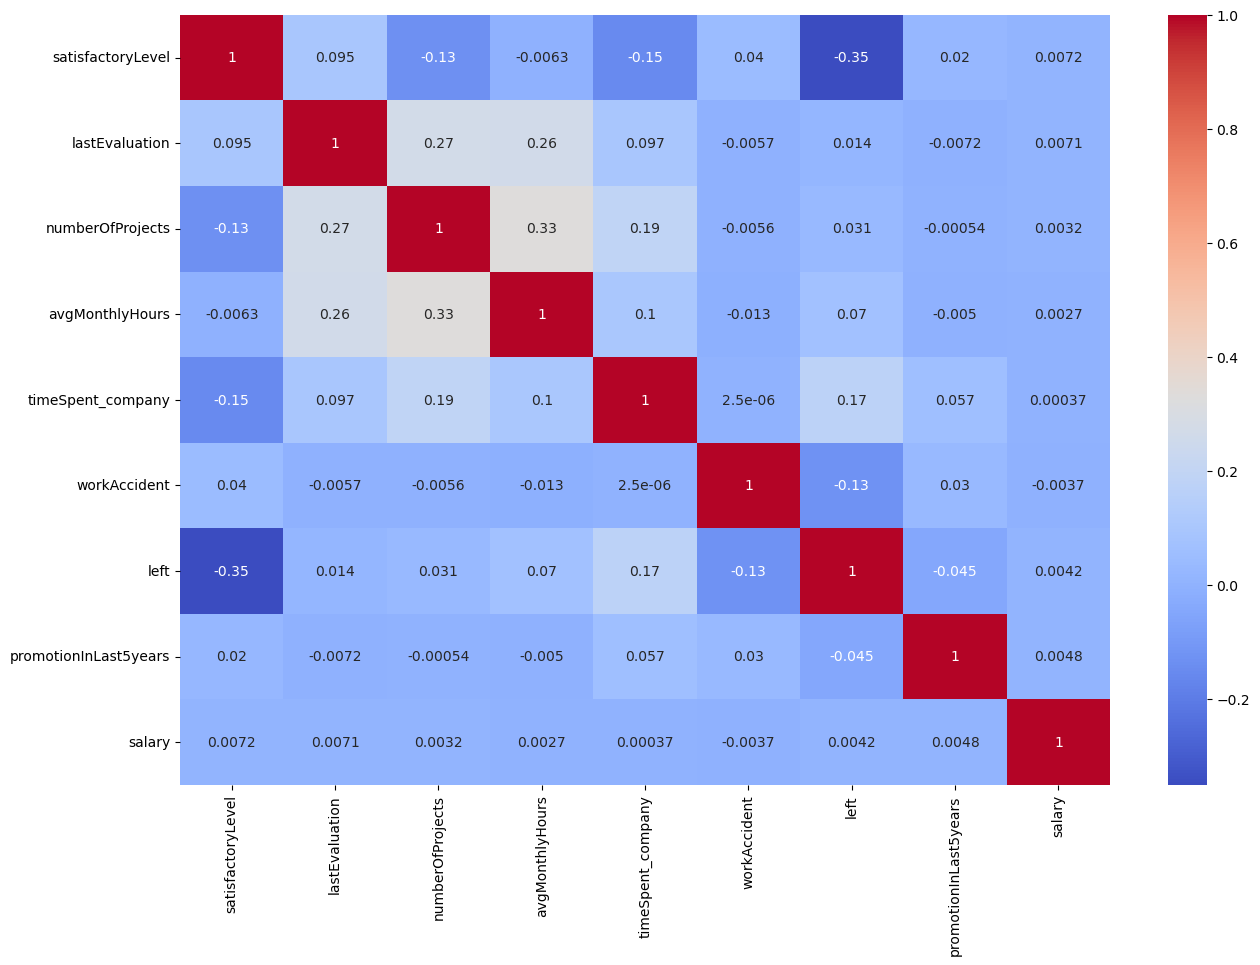

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

# Inferential Statistics

# Questions

In [23]:
# null hypothesis - avg monthly hours of a employee having 2 yrs exp and the employee more than that have same 167 hrs 
# alternate hypothesis - avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 
#                        2 yrs exp employee

In [24]:
#One sample T-test

from scipy.stats import ttest_1samp
# t_stat, p_value = ttest_1samp(sample['avgMonthlyHours'], p_mean)

In [25]:
employee=df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&
            (df.avgMonthlyHours<=200)]

In [26]:
employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
7,0.42,0.53,2,142,3,0,1,0,sales,1
8,0.45,0.54,2,135,3,0,1,0,sales,1


In [27]:
employee.shape

(1462, 10)

In [28]:
sample_size = 100
sample = employee.sample(sample_size, random_state=44)
sample

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
10615,0.43,0.60,3,138,3,0,0,1,RandD,2
343,0.44,0.54,2,151,3,0,1,0,management,1
3374,0.45,0.53,3,181,4,1,0,0,accounting,1
7889,0.39,0.75,6,185,3,0,0,1,management,0
12701,0.36,0.56,2,159,3,0,1,0,sales,2
...,...,...,...,...,...,...,...,...,...,...
13115,0.36,0.40,3,160,3,0,0,0,accounting,2
1879,0.49,1.00,3,176,3,0,0,0,support,2
11956,0.20,0.49,5,199,5,0,0,0,sales,1
7796,0.50,0.73,3,154,10,0,0,0,IT,2


In [29]:
# Given in question, 
p_mean = 167

In [30]:
sample_mean = sample['avgMonthlyHours'].mean()
print(sample_mean)

154.64


In [31]:
t_stat, p_value = ttest_1samp(sample['avgMonthlyHours'], p_mean)
print(t_stat, p_value)

-6.4178625093153565 4.795210006476476e-09


In [32]:
# To find critical value

n=len(employee["avgMonthlyHours"])
df=n-1
print(n,df)

1462 1461


In [33]:
alpha=0.05

In [34]:
from scipy.stats import t
cv=t.ppf([alpha/2,1-alpha/2],df) 
print(cv)

[-1.96158904  1.96158904]


In [35]:
# p value is less than 0.05
#reject null hypothesis,avg monthly hours is not 167 hours for employees having more than 2 yrs of exp

In [36]:
# Null hypothesis - percentage of employee leaving the company having the exp of 2 years is same as employee having exp more 
#                   than 2 yrs
# Alternate hypothesis - percentage of employee leaving the company having the exp of 2 years is different from the employee 
#                        having exp more than 2 yrs

In [37]:
#Ztest 

from statsmodels.stats.proportion import proportions_ztest

# z_stat, p_value = proportions_ztest(count=count,nobs=nobs, value=p0, alternative="two-sided",prop_var=False)

In [38]:
sample_size=100
sample = employee.sample(sample_size, random_state=44)

In [39]:
#no of women in the sample
count = sample["left"].value_counts()

#no. of obs
nobs = len(sample["left"])

#hypothesise value
p0 = 0.03  

In [40]:
z_stat, p_value = proportions_ztest(count=count,nobs=nobs, value=p0, alternative="two-sided",prop_var=False)
print(z_stat, p_value)

0.4242640687119293 0.6713732405408721


In [41]:
# To find critical value

from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

[-1.95996398  1.95996398]


In [42]:
# p value is greater than 0.05 accept null hypothesis and reject alternate hypothesis 
# percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs

In [43]:
# Null hypothesis - The mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee 
#                   having exp 6 - 10 yrs
# Alternate hypothesis - The mean avg monthly hours of a employee having experience of 2-5 yrs is not the same as that for 
#                        employee having exp 6 - 10 yrs

In [44]:
# Two sample t-test

In [45]:
# checking the variance of both

e1=df1[(df1.timeSpent_company>=2) & (df1.timeSpent_company<=5)]
e2=df1[(df1.timeSpent_company>=6) & (df1.timeSpent_company<=10)]

In [46]:
e1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
5,0.10,0.77,6,247,4,0,1,0,sales,1


In [47]:
e1.shape

(11167, 10)

In [48]:
e2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,sales,2
13,0.78,0.99,4,255,6,0,1,0,sales,1
26,0.84,0.87,4,246,6,0,1,0,hr,1
33,0.57,0.70,3,273,6,0,1,0,support,1
63,0.90,1.00,5,221,6,0,1,0,sales,2


In [49]:
e2.shape

(824, 10)

In [50]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [51]:
import scipy
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

In [52]:
# p value > 0.05 Hence accept null hypothesis
# The mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs

In [53]:
# F-test

In [54]:
# Sample Variance 
print(s1.avgMonthlyHours.var())
print(s2.avgMonthlyHours.var())

2324.24620603015
2680.904522613066


In [55]:
# Sample mean
print(s1.avgMonthlyHours.mean())
print(s2.avgMonthlyHours.mean())

203.005
203.3


In [56]:
df1=len(s1)-1
df2=len(s2)-1

In [57]:
# Computing f statistic
from scipy.stats import f
F=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(F)

0.8669634395501401


In [58]:
import scipy.stats

In [59]:
scipy.stats.f.cdf(F, df1, df2)

0.15739115729495057

In [60]:
f.ppf([alpha/2,1-alpha/2],df1, df2)

array([0.75678659, 1.32137648])

In [ ]:
# p value is >0.05, accept null hypotehsis, equal variances